# An Exploration of Staffing Changes for the 2018-2019 Portland Public School Year 

In [244]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as sm

os.chdir("C://Users//Jeanette//Neighborhood")

Orginal Data may be found in our API: http://service.civicpdx.org/neighborhood-development/

In [245]:
data = pd.read_csv("2018_Year_to_Year_Change_in_Gen_Fund v4.csv")

In [246]:
data = data.fillna(0)

In [247]:
data.head()

,School,2018-19 % Free Meals by Direct Cert,2017-18 Student Count (all grades),2018-19 Student Count (all grades),% Changes in Enrollment,2018-19 Total FTE,% Change in FTE,Students per FTE 2018 - 19,Enroll #,Combined Underserved #,...,Black #,Black %,Latino #,Latino %,Native American #,Native American %,pacific Islander #,pacific Islander %,Multi-Race #,Multi-Race %
0,Alliance,0.43,275,275,0.00,28.75,0.06,8.8,191,144,...,38,0.199,42,0.220,4.0,0.021,1,0.050,17,0.089
1,Rosa Parks,0.76,297,259,-0.13,23.30,-0.12,10.0,272,262,...,120,0.441,73,0.268,2.0,0.007,6,0.022,25,0.092
2,Peninsula,0.36,284,283,0.00,20.30,-0.05,13.0,279,190,...,32,0.115,65,0.233,0.0,0.000,5,0.018,29,0.104
3,Whitman,0.51,252,258,0.02,20.82,0.01,10.7,283,213,...,21,0.074,89,0.314,7.0,0.025,1,0.004,17,0.060
4,Woodmere,0.47,295,301,0.02,21.35,-0.01,12.5,286,220,...,17,0.059,69,0.241,2.0,0.007,6,0.021,29,0.101


In [248]:
data.columns

Index(['School ', '2018-19 % Free Meals by Direct Cert',
       '2017-18 Student Count (all grades)',
       '2018-19 Student Count (all grades)', '% Changes in Enrollment',
       '2018-19 Total FTE', '% Change in FTE', 'Students per FTE 2018 - 19',
       'Enroll #', 'Combined Underserved #', 'Combined Underserved % ',
       'Direct Certification #', 'Direct Certification % ', 'SpEd # ',
       'SpEd %', 'LEP #', 'LEP %', 'Historically Underserved #',
       'Historically Underserved % ', 'Black # ', 'Black %', 'Latino #',
       'Latino %', 'Native American #', 'Native American %',
       'pacific Islander #', 'pacific Islander %', 'Multi-Race #',
       'Multi-Race %'],
      dtype='object')

In [249]:
simple_x = data[['Historically Underserved % ',
                '% Changes in Enrollment',
                "2018-19 % Free Meals by Direct Cert"
]]
                 
simple_yRAW = data[["Students per FTE 2018 - 19"
               
]]



In [250]:
regrRAW = linear_model.LinearRegression()
regrRAW.fit(simple_x,simple_yRAW)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [251]:
print(regrRAW.score(simple_x,simple_yRAW))

0.809362795344


In [252]:
regrPER.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [253]:
import seaborn as sns

In [254]:
regrRAW.coef_

array([[ -2.69067028,   1.58560361, -10.91136032]])

In [255]:
simple = data[['Historically Underserved % ',
                '% Changes in Enrollment',
                "2018-19 % Free Meals by Direct Cert",
               "Students per FTE 2018 - 19"
]]

In [256]:
# sns.residplot(x = "2018-19 % Free Meals by Direct Cert", y = "Students per FTE 2018 - 19", data = simple, lowess=True, color="g")
plt.show()

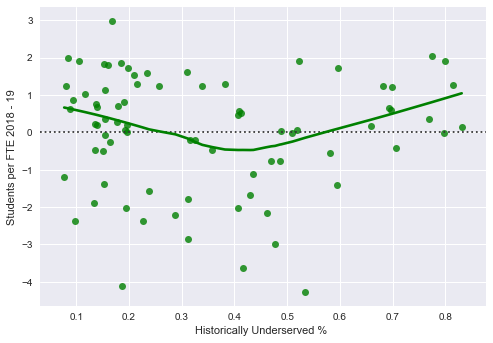

In [257]:
sns.residplot(x = 'Historically Underserved % ', y = "Students per FTE 2018 - 19", data = simple, lowess=True, color="g")
plt.show()

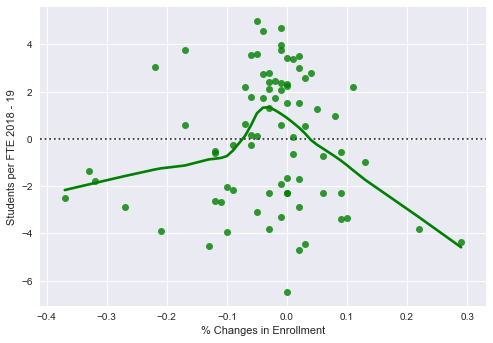

In [258]:
sns.residplot(x = '% Changes in Enrollment', y = "Students per FTE 2018 - 19", data = simple, lowess=True, color="g")
plt.show()

In [259]:
regrRAW.intercept_

array([ 18.82106829])

In [260]:
pre = regrRAW.predict(simple_x)

In [261]:
len(pre)
#len(simple_yRAW)

79

In [262]:
dataresults = simple_yRAW

In [263]:
dataresults["Predictions"] = pre

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [264]:
TSS = dataresults["Students per FTE 2018 - 19"] - dataresults["Predictions"]
dataresults["Variation"] = TSS

dataresults["School"] = data["School "]
dataresults['Historically Underserved % '] = data['Historically Underserved % ']
dataresults['% Changes in Enrollment'] = data['% Changes in Enrollment']
dataresults["2018-19 % Free Meals by Direct Cert"] = data["2018-19 % Free Meals by Direct Cert"]


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [265]:
dataresults.sort_values("Variation")

,Students per FTE 2018 - 19,Predictions,Variation,School,Historically Underserved %,% Changes in Enrollment,2018-19 % Free Meals by Direct Cert
19,12.7,16.849989,-4.149989,Metro. Learning Center,0.187,-0.10,0.12
0,8.8,12.692365,-3.892365,Alliance,0.534,0.00,0.43
6,15.5,18.022185,-2.522185,Access,0.134,-0.07,0.03
5,14.7,17.110115,-2.410115,Skyline,0.195,-0.06,0.10
9,15.8,17.847972,-2.047972,Stephenson,0.153,-0.01,0.05
7,10.7,12.532305,-1.832305,Vestal,0.416,-0.37,0.42
29,16.8,18.584053,-1.784053,Forest Park,0.077,0.05,0.01
14,13.5,15.242792,-1.742792,Creston,0.288,0.09,0.27
53,15.4,16.718307,-1.318307,Woodstock,0.098,0.01,0.17
3,10.7,12.004537,-1.304537,Whitman,0.477,0.02,0.51


In [266]:
regrRAW.intercept_[0] + regrRAW.coef_[0][0]*.775 + regrRAW.coef_[0][1]*.1 + regrRAW.coef_[0][2]*.62

10.129315782541831

In [267]:
regrRAW.coef_[0][0]

-2.6906702831872287